In [1]:
import json
import sys
sys.path.append("../")

from models import DiffusivityData
from help_functions import *
from pathlib import Path
from optimize import Optimizer
from plots import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

## Prepare the data in DiffusionData object.

In [2]:
Path().joinpath("./examples/AgCu_diffusion_coefficient_data.xlsx").absolute().__str__()
# Path().joinpath("/examples/AgCu_diffusion_coefficient_data.xlsx").absolute()

'C:\\Users\\ustcw\\Desktop\\Research\\DCModeling\\examples\\examples\\AgCu_diffusion_coefficient_data.xlsx'

In [3]:
# Define a DiffusionData object.
elements = ["Ag", "Cu"]
phase = "FCC_A1"
diffusion_data = DiffusivityData(elements)
# load data
datafile = "./AgCu_diffusion_coefficient_data.xlsx"
diffusion_data.load_data_from_excel(datafile)

# thermodynamic interaction parameter datafile
thermo_inter_param_file = "./AgCu_thermodynamic_interaction_parameters.json"
diffusion_data.load_interaction_parameters(thermo_inter_param_file)
#
# # calculate end member diffusion coefficient data.
# end_member_file = "./end_member_database.json"
end_member_file = "./all_end_members_database.json"
diffusion_data.end_member_calc(end_member_file)


In [4]:
diffusion_data.data.head()

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin
0,Sato et al.,DT,A,99.164678,850.0,1.079941e-13,NaN,1,0.991647,0.008353,850.0,1123.0
1,Sato et al.,DT,A,97.446300,850.0,1.453115e-13,NaN,1,0.974463,0.025537,850.0,1123.0
2,Sato et al.,DT,A,96.634840,850.0,1.630797e-13,NaN,1,0.966348,0.033652,850.0,1123.0
3,Sato et al.,DT,A,99.164678,820.0,6.165950e-14,NaN,1,0.991647,0.008353,820.0,1093.0
4,Sato et al.,DT,A,97.446300,820.0,8.433348e-14,NaN,1,0.974463,0.025537,820.0,1093.0


In [5]:
""" using Thermo-Calc owned databases. """
# tc_database="TCAL7"
# diffusion_data.thermodynamic_factor_calc(database_mode="calphad", database=tc_database)

""" read self defined database """
diffusion_data.thermodynamic_factor_calc()

diffusion_data.data.head()

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin
0,Sato et al.,DT,A,99.164678,850.0,1.079941e-13,0.976375,1,0.991647,0.008353,850.0,1123.0
1,Sato et al.,DT,A,97.446300,850.0,1.453115e-13,0.926879,1,0.974463,0.025537,850.0,1123.0
2,Sato et al.,DT,A,96.634840,850.0,1.630797e-13,0.903121,1,0.966348,0.033652,850.0,1123.0
3,Sato et al.,DT,A,99.164678,820.0,6.165950e-14,0.975150,1,0.991647,0.008353,820.0,1093.0
4,Sato et al.,DT,A,97.446300,820.0,8.433348e-14,0.923147,1,0.974463,0.025537,820.0,1093.0


## compare tc-calculated and self-calculated thermodynamic factor

In [6]:
# tf_tc = diffusion_data.data.TF
# diffusion_data.thermodynamic_factor_calc()
# tf_self = diffusion_data.data.TF
# plt.scatter(tf_tc, tf_self, s=100)
# diffusion_data.data.head()

## Optimize the parameters using Optimizer object


In [7]:
optimizer = Optimizer(diffusion_data)


In [8]:
optimizer.diffusivity_data.data

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin
0,Sato et al.,DT,A,99.164678,850.0,1.079941e-13,0.976375,1,0.991647,0.008353,850.0,1123.0
1,Sato et al.,DT,A,97.446300,850.0,1.453115e-13,0.926879,1,0.974463,0.025537,850.0,1123.0
2,Sato et al.,DT,A,96.634840,850.0,1.630797e-13,0.903121,1,0.966348,0.033652,850.0,1123.0
3,Sato et al.,DT,A,99.164678,820.0,6.165950e-14,0.975150,1,0.991647,0.008353,820.0,1093.0
4,Sato et al.,DT,A,97.446300,820.0,8.433348e-14,0.923147,1,0.974463,0.025537,820.0,1093.0
...,...,...,...,...,...,...,...,...,...,...,...,...
124,Oikawa et al.,DC,AB,99.893939,701.0,6.025596e-15,0.996148,1,0.998939,0.001061,701.0,974.0
125,Oikawa et al.,DC,AB,99.000000,701.0,5.128614e-15,0.963507,1,0.990000,0.010000,701.0,974.0
126,Oikawa et al.,DC,AB,98.000000,701.0,4.677351e-15,0.926641,1,0.980000,0.020000,701.0,974.0
127,Oikawa et al.,DC,AB,96.000000,701.0,4.265795e-15,0.851923,1,0.960000,0.040000,701.0,974.0


In [9]:
optimizer.init_params

array([0.52416468])

In [10]:
# predict diffusion coefficients
diff_calc = optimizer.diffusivity_data.diffusion_coefs_calc([62922.572308])
diff_calc

0      9.028361e-14
1      1.002918e-13
2      1.052506e-13
3      5.389417e-14
4      6.000107e-14
           ...     
124    6.773377e-15
125    6.832043e-15
126    6.878031e-15
127    6.903113e-15
128    6.831803e-15
Length: 129, dtype: float64

In [11]:
# optimizer.init_params = [0.1, 0.2]
# optimizer.model="2-para"
# optimizer.method = "least_squares"
optimizer.optimize()

# optimizer.method = "minimize"
# optimizer.optimize(method="Nelder-Mead")

In [12]:
optimizer.optimized_results

{'OptimizedResult':  active_mask: array([0.])
         cost: 4.91175751524894
          fun: array([-0.17830904, -0.36835805, -0.43470915, -0.1337712 , -0.33791164,
        -0.38688713, -0.1075908 , -0.30998389, -0.32490203, -0.10298752,
        -0.27937473, -0.38901316, -0.624752  , -0.50939249, -0.55455202,
        -0.4259901 , -0.60019011, -0.50117896, -0.41116954, -0.31215839,
        -0.39414366, -0.26220553,  0.11175167,  0.02380441,  0.03207276,
        -0.0816703 , -0.10516585,  0.13288904, -0.01215113, -0.05178487,
        -0.15030954, -0.10144375,  0.02064949, -0.08901309, -0.07100171,
        -0.16970265, -0.23380694,  0.12761759, -0.01960618, -0.02831688,
        -0.12171037, -0.14632587,  0.16004871,  0.06274852, -0.02853475,
        -0.16261289, -0.12693607,  0.01988636, -0.11058264, -0.1576355 ,
        -0.168464  , -0.21725356, -0.08984995, -0.18911352, -0.33124525,
        -0.3985356 , -0.43878797,  0.01554893, -0.15010978, -0.21346053,
        -0.39923582, -0.39873514

In [13]:
df = diffusion_data.data

In [14]:
# df.plot(x = "Dexp", y = "D_1-para", kind="scatter", logx=True, logy=True)

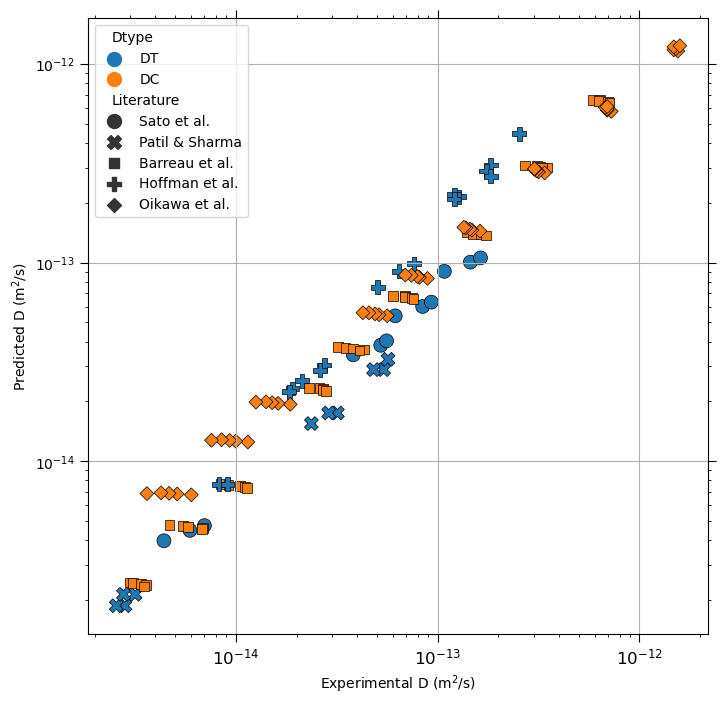

In [15]:
# matplotlib.rcParams['markers.fillstyle'] = "none"
# matplotlib.rcParams['lines.marker'] = None
matplotlib.rcParams['lines.markersize'] = 10
# matplotlib.rcParams['lines.markeredgecolor'] = "black"
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Experimental D (m$^2$/s)")
ax.set_ylabel("Predicted D (m$^2$/s)")
ax.set_xscale('log')
ax.set_yscale('log', basey=10)
ax.grid(True)
# ax.set_fc("b")
sns.scatterplot(
    data=df, x="Dexp", y="D_1-para", hue="Dtype", style="Literature",
    ax=ax, palette="tab10", edgecolor="black", linewidth=0.5
)

In [16]:
diffusion_data.data

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin,D_1-para
0,Sato et al.,DT,A,99.164678,850.0,1.079941e-13,0.976375,1,0.991647,0.008353,850.0,1123.0,9.035691e-14
1,Sato et al.,DT,A,97.446300,850.0,1.453115e-13,0.926879,1,0.974463,0.025537,850.0,1123.0,1.005366e-13
2,Sato et al.,DT,A,96.634840,850.0,1.630797e-13,0.903121,1,0.966348,0.033652,850.0,1123.0,1.055865e-13
3,Sato et al.,DT,A,99.164678,820.0,6.165950e-14,0.975150,1,0.991647,0.008353,820.0,1093.0,5.393913e-14
4,Sato et al.,DT,A,97.446300,820.0,8.433348e-14,0.923147,1,0.974463,0.025537,820.0,1093.0,6.015155e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Oikawa et al.,DC,AB,99.893939,701.0,6.025596e-15,0.996148,1,0.998939,0.001061,701.0,974.0,6.774188e-15
125,Oikawa et al.,DC,AB,99.000000,701.0,5.128614e-15,0.963507,1,0.990000,0.010000,701.0,974.0,6.839688e-15
126,Oikawa et al.,DC,AB,98.000000,701.0,4.677351e-15,0.926641,1,0.980000,0.020000,701.0,974.0,6.893276e-15
127,Oikawa et al.,DC,AB,96.000000,701.0,4.265795e-15,0.851923,1,0.960000,0.040000,701.0,974.0,6.933121e-15


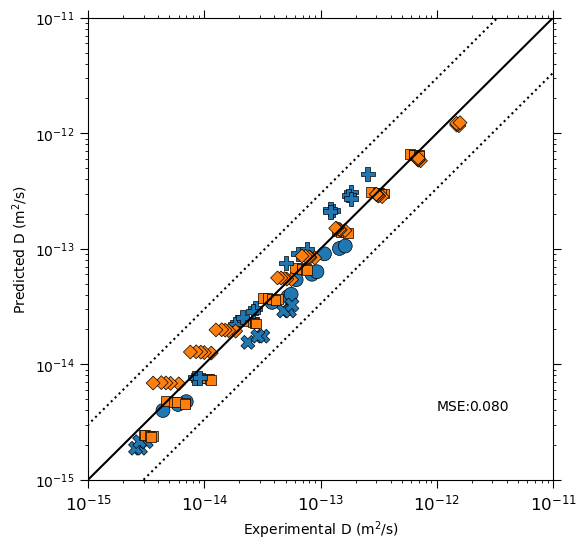

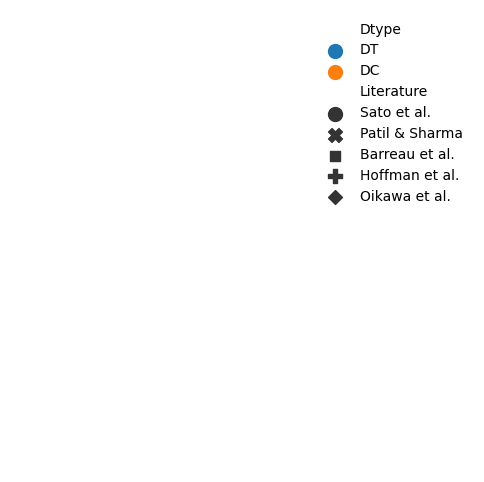

In [17]:
from plots import *
# matplotlib.rcdefaults()
# matplotlib.rcParams['xtick.top'] = True
# matplotlib.rcParams['ytick.right'] = True
# matplotlib.rcParams['xtick.major.size'] = 6
# matplotlib.rcParams['ytick.major.size'] = 6
# matplotlib.rcParams['lines.markersize'] = 10
# matplotlib.rcParams['xtick.minor.size'] = 2
# matplotlib.rcParams['ytick.minor.size'] = 2
# matplotlib.rcParams['xtick.labelsize'] = 12
# matplotlib.rcParams['ytick.labelsize'] = 12
# matplotlib.rcParams['axes.labelsize'] = 12
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
fig_legend, ax_legend = plt.subplots(figsize=(6,6))
exp_vs_pred_plot(diffusion_data.data, "1-para", ax, ax_legend, hue='Dtype', style='Literature', )

# matplotlib.rcdefaults()

In [18]:
diffusion_data.end_dc.keys()

dict_keys(['AA', 'AB', 'BA', 'BB'])

In [19]:
comps = np.arange(0, 1.01, 0.01)
temps = diffusion_data.data.temp_celsius.unique()
grid_data = comp_temp_dataframe(comps, temps)
grid_data["TF"] = thermodynamic_factor_user_defined(diffusion_data.thermodynamic_interaction_parameters,
                                  grid_data["comp_A_mf"], grid_data["comp_B_mf"], grid_data["temp_kelvin"])
# grid_data["TF"] = thermodynamic_factor_calphad_engine(grid_data, diffusion_data.elements, "TCAL7")
end_dc = end_member_diffusion_coefs(diffusion_data.elements, end_member_file, grid_data["temp_kelvin"])
all_dc = binary_diffusion_coefs(optimizer.optimized_results["optimized_params"], grid_data["comp_A_mf"],                                                    grid_data["temp_kelvin"], grid_data["TF"], end_dc)

grid_data = pd.concat([grid_data, pd.DataFrame(all_dc)], axis=1)

In [20]:
len(grid_data)

3131

In [21]:
literature_list = diffusion_data.data["Literature"].unique()[4:5]
x_type = "temperature"
literature_list

array(['Oikawa et al.'], dtype=object)

(0.0, 0.1)

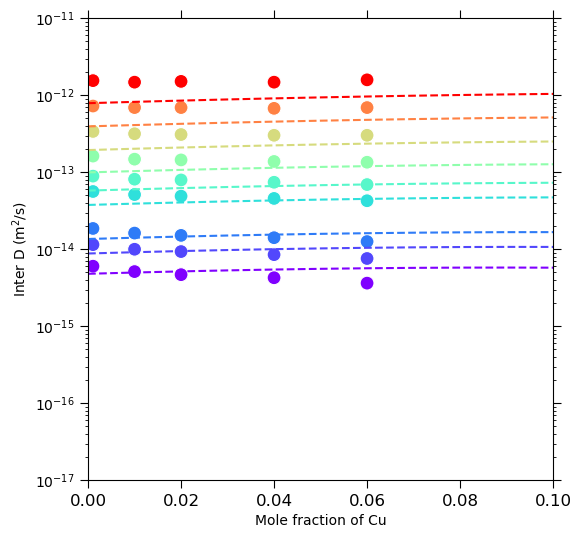

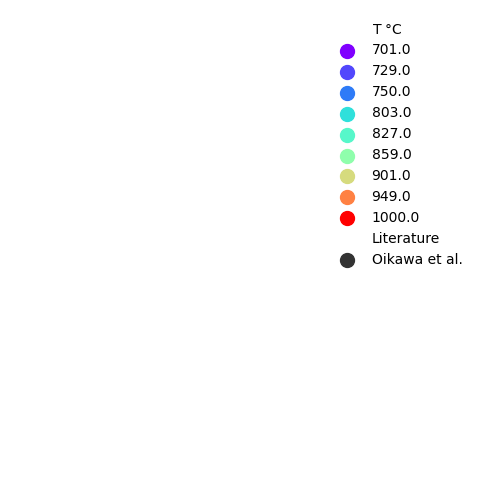

In [22]:
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
fig_legend, ax_legend = plt.subplots(figsize=(6,6))
conditions_plot(diffusion_data, grid_data, literature_list, x_type, ax, ax_legend, diffusion_type="DC",
                element="", x_axis_element="B", palette="rainbow")
ax.set_xlim(0, 0.1)

In [23]:
fig.savefig("plot_Oikawa et al.png", dpi=400)

In [24]:
comps = diffusion_data.data.comp_A_mf.unique()
temps = np.arange(diffusion_data.data.temp_celsius.min(), diffusion_data.data.temp_celsius.max() + 50, 50)
grid_data = comp_temp_dataframe(comps, temps)
grid_data["TF"] = thermodynamic_factor_user_defined(diffusion_data.thermodynamic_interaction_parameters,
                                  grid_data["comp_A_mf"], grid_data["comp_B_mf"], grid_data["temp_kelvin"])
# grid_data["TF"] = thermodynamic_factor_calphad_engine(grid_data, diffusion_data.elements, "TCAL7")
end_dc = end_member_diffusion_coefs(diffusion_data.elements, end_member_file, grid_data["temp_kelvin"])
all_dc = binary_diffusion_coefs(optimizer.optimized_results["optimized_params"], grid_data["comp_A_mf"],                                                    grid_data["temp_kelvin"], grid_data["TF"], end_dc)

grid_data = pd.concat([grid_data, pd.DataFrame(all_dc)], axis=1)

(0.095, 0.115)

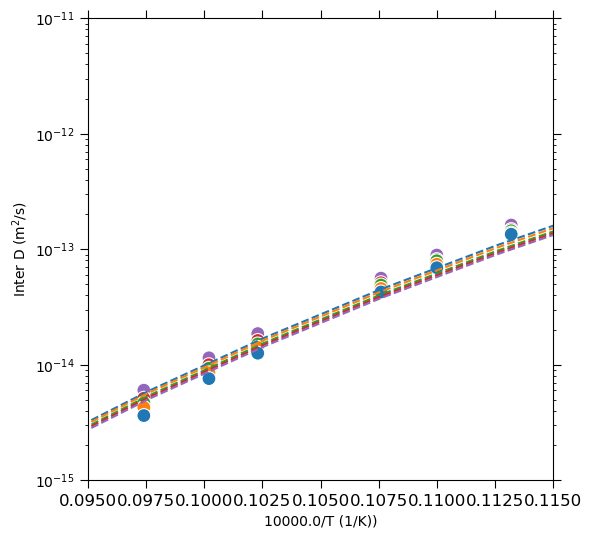

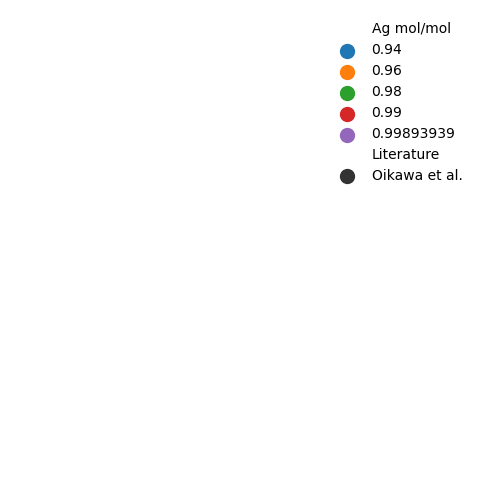

In [25]:
literature_list = diffusion_data.data["Literature"].unique()[4:5]
x_type = "composition"
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
fig_legend, ax_legend = plt.subplots(figsize=(6,6))
conditions_plot(diffusion_data, grid_data, literature_list, x_type, ax, ax_legend, diffusion_type="DC",
                element="", x_axis_element="B", palette="tab10")
ax.set_xlim(0.095, 0.115)

In [26]:
data_file = "C:/Users/ustcw/Desktop/Research/Binary_assessment/FCC_ub_params.xlsx"
save_file = "all_end_members_database.json"
end_member_database_from_excel_to_json(data_file, save_file)




                  Al        Co        Cr        Cu            Fe        Mn  \
Unnamed: 0                                                                   
Al          0.000018  0.032766  0.675000  0.000044  3.620000e-01  0.013500   
Co          0.000154  0.000218  0.000017  0.000100  2.100000e-05  0.000009   
Cr          0.000064  0.000063  0.000063  0.000063  6.340000e-05  0.000063   
Cu          0.000011  0.000064  0.000026  0.000049  4.840000e-05  0.000043   
Fe          0.000022  0.000112  0.001060  0.000034  4.600000e-05  0.000003   
Mn          0.000070  0.000072  0.000076  0.000035  7.550000e-05  0.000073   
Mo               NaN       NaN       NaN       NaN           NaN       NaN   
Nb               NaN       NaN       NaN       NaN           NaN       NaN   
Ni          0.000100  0.000242  0.000520  0.000035  1.000000e-04  0.000140   
Pd               NaN  0.000006       NaN       NaN  5.000000e-05       NaN   
Pt               NaN  0.000006       NaN  0.000006           NaN

In [27]:
diffusion_data.data.iloc[0]["A_mp"]

99.164678